In [2]:
import soundfile as sf
from __future__ import  division
import numpy as np
import matplotlib.pyplot as plt
import librosa
%matplotlib inline
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU



def wave_to_spectum(x, n_fft):
    S = librosa.stft(x, n_fft) 
    A = np.log1p(np.abs(S))  
    return A




    

In [2]:
dir = []
rootdir = r"C:\Users\Yuchen Jin\Documents\190\project\src\musdb18\train"
for subdir, dirs, files in os.walk(rootdir):
    for name in dirs:
        dir.append(rootdir+ '\\'+ name + '\mixture.wav' )

data = []

In [3]:
data = np.zeros((0,1025,100))
for i in range(30):
    path = dir[i]
    sample, sample_rate = librosa.load(path)
    n_fft = 2048
    imdata = wave_to_spectum(sample,n_fft)
    imdata = np.pad(imdata, [(0, 0), (0, 100-np.shape(imdata)[1]%100)], mode='constant')
    data = np.concatenate((data, np.reshape(imdata,(int(np.shape(imdata)[1]/100),1025,100))), axis=0)

C:\Users\Yuchen Jin\Documents\190\project\src\musdb18\train\A Classic Education - NightOwl\mixture.wav
(3776000,)
(1025, 7376)
(1025, 7400)
(74, 1025, 100)
0.037011343985795975
0.037697914987802505
0.25228792428970337
0.07100467383861542
0.25973185896873474
0.27230706810951233
0.11588098108768463
0.0232117660343647
0.0318138562142849
0.20603525638580322
0.04882912337779999
0.04726800322532654
0.06365781277418137
0.34464946389198303
0.08109881728887558
0.2068355828523636
0.0020344858057796955
0.07636069506406784
0.16933974623680115
0.05114992335438728
0.022577431052923203
0.04030148684978485
0.050880104303359985
0.011875252239406109
0.04048023745417595
0.06939657032489777
0.06327389925718307
0.2423442304134369
0.03427984565496445
0.32737991213798523
0.07872684299945831
0.08795631676912308
0.053388241678476334
0.04501378908753395
0.16411565244197845
0.15418030321598053
0.1539316177368164
0.06633760035037994
0.11948047578334808
0.055134981870651245
0.04937247559428215
0.07687575370073318


In [4]:
dir = []
rootdir = r"C:\Users\Yuchen Jin\Documents\190\project\src\musdb18\train"
for subdir, dirs, files in os.walk(rootdir):
    for name in dirs:
        dir.append(rootdir+ '\\'+ name + '\\vocals.wav' )

C:\Users\Yuchen Jin\Documents\190\project\src\musdb18\train\A Classic Education - NightOwl\vocals.wav
(3776000,)
(1025, 7376)
(1025, 7400)
[0.01405855]
[0.01681321]
[0.19692697]
[0.27705646]
[0.1172968]
[0.06107742]
[0.03244306]
[0.03844644]
[0.00364584]
[0.02607604]
[0.03700142]
[0.04390515]
[0.02928467]
[0.02741827]
[0.07153561]
[0.1427006]
[0.21280818]
[0.20617256]
[0.56765062]
[0.74568671]
[1.87955832]
[1.73618162]
[0.42497671]
[0.138072]
[0.1186236]
[0.04308474]
[0.06168165]
[0.06967382]
[0.08087301]
[0.28111726]
[0.35462347]
[0.58221513]
[0.96676731]
[0.65277916]
[0.32089937]
[0.69553155]
[0.76635265]
[0.40336958]
[0.84813166]
[1.01806271]
[1.48517716]
[1.72799814]
[1.07965815]
[0.32214719]
[0.48135573]
[0.41018972]
[0.48356211]
[0.49117431]
[0.5383839]
[0.2738634]
[0.03481383]
[0.32919031]
[0.34386724]
[0.18302146]
[0.35991442]
[0.62331736]
[0.60621202]
[0.48017016]
[0.4476569]
[0.99497432]
[2.65621519]
[3.23155737]
[2.77518725]
[1.91732085]
[1.11877334]
[0.54175818]
[0.63635689

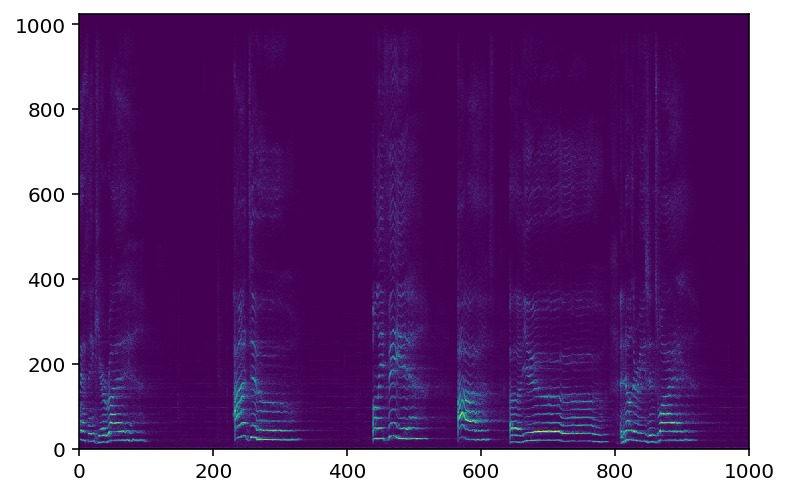

In [25]:
y_in = np.zeros((0,1025,1))
ind = 0
for i in range(1):
    path = dir[i]
    sample, sample_rate = librosa.load(path)
    n_fft = 2048
    imdata = wave_to_spectum(sample,n_fft)
    imdata = np.pad(imdata, [(0, 0), (0, 100-np.shape(imdata)[1]%100)], mode='constant')
    plt.pcolormesh(imdata.T[0:1000].T)
    for j in range(0,int(np.shape(imdata)[1]/100)):
        y_in = np.concatenate((y_in, (np.reshape(imdata.T[j*100+50],(1,1025,1)))), axis=0)


In [6]:
def create_network():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(1025, 100, 1)))
    model.add(LeakyReLU())
    model.add(Conv2D(16, (3,3), padding='same'))
    model.add(LeakyReLU())
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.3))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(LeakyReLU())
    model.add(Conv2D(16, (3,3), padding='same'))
    model.add(LeakyReLU())
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(Dropout(0.5))
    model.add(Dense(1025, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


model = create_network()



C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [7]:
import gc
gc.collect()

16963

In [26]:
def train_network(data, y_in, model):
    """ Train a Neural Network to seperate vocal """
    
    network_input = np.reshape(data,(np.shape(data)[0],1025,100,1))
    network_output = np.reshape(y_in,(np.shape(y_in)[0],1025))
    network_output = np.where(network_output > 0.01, 1, 0)



 
    checkpoint = keras.callbacks.ModelCheckpoint(
        "weights2-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5",
        monitor='loss',
        verbose=0,
        save_best_only=True,
        mode='min'
    )
    
    callbacks_list = [checkpoint]

    print("training...")
    model.fit(network_input, network_output, batch_size=20, epochs=300, callbacks=callbacks_list)
train_network(data,y_in,model)

training...
Epoch 1/300
4/4 [==============================] - 0s 62ms/step - loss: 5.0455
Epoch 2/300
4/4 [==============================] - 0s 56ms/step - loss: 2.1476
Epoch 3/300
4/4 [==============================] - 0s 58ms/step - loss: 2.7068
Epoch 4/300
4/4 [==============================] - 0s 58ms/step - loss: 2.2827
Epoch 5/300
4/4 [==============================] - 0s 58ms/step - loss: 0.7296
Epoch 6/300
4/4 [==============================] - 0s 57ms/step - loss: 0.7099
Epoch 7/300
4/4 [==============================] - 0s 60ms/step - loss: 0.6555
Epoch 8/300
4/4 [==============================] - 0s 56ms/step - loss: 0.6012
Epoch 9/300
4/4 [==============================] - 0s 57ms/step - loss: 0.5932
Epoch 10/300
4/4 [==============================] - 0s 55ms/step - loss: 0.5764
Epoch 11/300
4/4 [==============================] - 0s 59ms/step - loss: 0.5716
Epoch 12/300
4/4 [==============================] - 0s 58ms/step - loss: 0.5534
Epoch 13/300
4/4 [===================

In [3]:

model = keras.models.load_model('ADAM_BINARYCROSSENTROPY0.0410.hdf5')



In [46]:


path = r"C:\Users\Yuchen Jin\Documents\190\project\src\musdb18\test\Girls Under Glass - We Feel Alright\mixture.wav"
sample, sample_rate = librosa.load(path)
print(np.shape(sample))
n_fft = 2048
indata = wave_to_spectum(sample,n_fft)


indata = np.pad(indata, [(0, 0), (0, 100-np.shape(indata)[1]%100)], mode='constant')



(6991872,)


In [47]:
the_stft = librosa.stft(sample,n_fft)
the_stft = np.pad(the_stft, [(0, 0), (0, 100-np.shape(the_stft)[1]%100)], mode='constant')


In [48]:
result = np.zeros((0,1025,1))
for i in range(0,np.shape(indata)[1]-100):
    pred = model.predict(np.reshape((indata.T[i:i+100]).T,(1,1025,100,1)))
    
    result = np.concatenate((result,np.reshape(pred,(1,1025,1))), axis = 0)

In [ ]:

result2 = np.concatenate((np.zeros((49,1025,1)),result), axis = 0)
result2 = np.concatenate((result2,np.zeros((51,1025,1))), axis = 0)
result2 = np.reshape(result2,(np.shape(result2)[0],1025)).T
result2 = np.multiply(np.round(result2), the_stft)
final_result = librosa.istft(result2, win_length=n_fft)






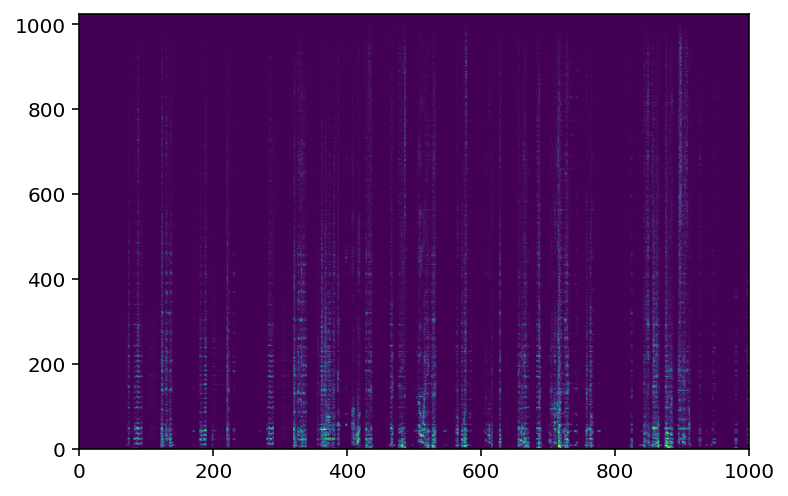

In [ ]:

indata1 = wave_to_spectum(final_result,n_fft)
plt.pcolormesh(indata1.T[0:1000].T)

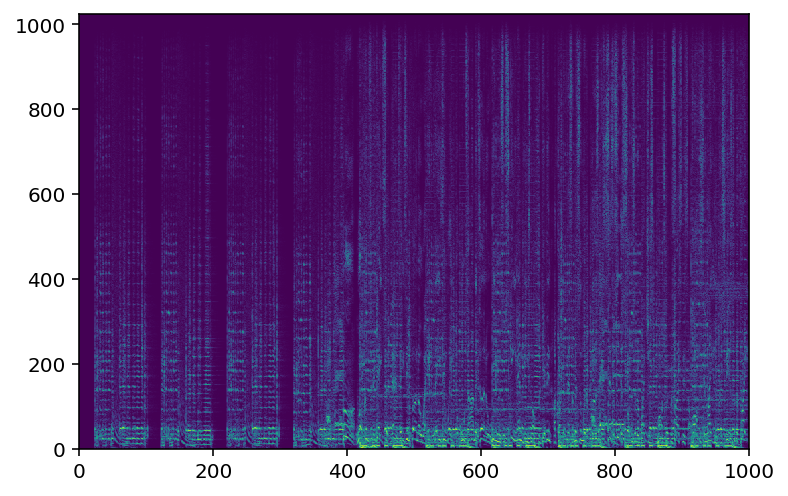

In [ ]:
plt.pcolormesh(indata.T[0:1000].T)

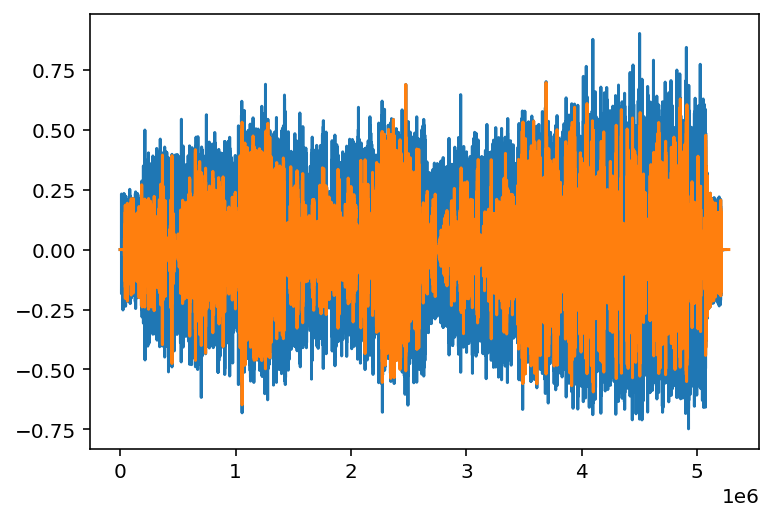

In [ ]:
sf.write("text.wav", final_result,sample_rate)
plt.plot(sample)
plt.plot(final_result)

In [ ]:
import museval

def calculate_sdr(ref, est, scaling=False):
    s = museval.evaluate(ref[None,:,None], est[None,:,None], win = len(ref), hop = len(ref))
    return s[0][0]


print(calculate_sdr(sample, final_result))

[1.9558578]


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1025, 100, 32)     320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1025, 100, 32)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1025, 100, 16)     4624      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 1025, 100, 16)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 341, 33, 16)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 341, 33, 16)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 341, 33, 64)      